<a href="https://colab.research.google.com/github/shreyagarge/demos_colab/blob/master/demo_fashion_mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


Instructions for updating:
non-resource variables are not supported in the long term


In [0]:
# import your datasets

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


# 0 	T-shirt/top
# 1 	Trouser
# 2 	Pullover
# 3 	Dress
# 4 	Coat
# 5 	Sandal
# 6 	Shirt
# 7 	Sneaker
# 8 	Bag
# 9 	Ankle boot

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



(60000, 28, 28)
60000
labels:  [9 0 0 3 0 2 7 2 5 5]


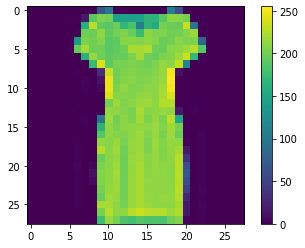

this is a Dress


In [34]:
# understand the data

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(train_images.shape)
print(len(train_labels))
print("labels: ", train_labels[:10])

# plot one of the images from the training set
tester = 20
plt.figure()
plt.imshow(train_images[tester])
plt.colorbar()
plt.grid(False)
plt.show()

print("this is a", class_names[train_labels[tester]])


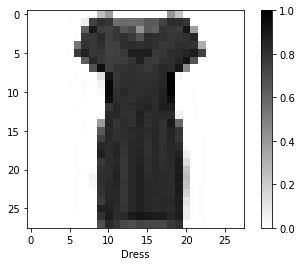

In [35]:
# normalise the data for processing to the range 0-1

train_images = train_images / 255.0

test_images = test_images / 255.0

# test it
plt.grid(False)
plt.imshow(train_images[tester], cmap=plt.cm.binary)
plt.colorbar()
plt.xlabel(class_names[train_labels[tester]])
plt.show()



In [36]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [38]:
# the magic 
model.fit(train_images, train_labels, epochs=10)


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.5040 - acc: 0.8241
Epoch 2/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3799 - acc: 0.8631
Epoch 3/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3395 - acc: 0.8775
Epoch 4/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3153 - acc: 0.8840
Epoch 5/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2983 - acc: 0.8906
Epoch 6/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2815 - acc: 0.8959
Epoch 7/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2716 - acc: 0.8993
Epoch 8/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2593 - acc: 0.9044
Epoch 9/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2509 - acc: 0.9069
Epoch 10/10
60000/60000 [==============================] - 

In [39]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


10000/10000 - 0s - loss: 0.3448 - acc: 0.8779


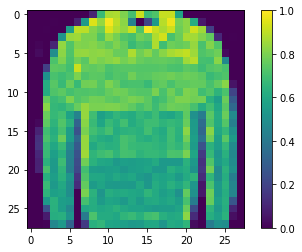

'Pullover'

In [45]:
# the final layer was softmax so the prediction is going to be an array with 10 values, each corresponding the confidence of the label.
predictions = model.predict(test_images)

tester = 20
plt.figure()
plt.imshow(test_images[tester])
plt.colorbar()
plt.grid(False)
plt.show()
# the winner is the label with the highest confidence
class_names[np.argmax(predictions[tester])]

